# Simulation of Exome-wide CNV data for case control samples

## Simulation outline
For given type of CNV (e.g. duplication) we first simulate all the variants across exome, 
then assign these simulated CNVs to genes. For case samples we expect an enrichment in causal
genes and the enrichment should be quantified by relative risk of a CNV's contribution to disease
when presented in causal gene vs. non causal gene.

## Parameters
We define causal CNV as CNV in causal gene, and denote it as CCNV. Likewise we have NCNV for non-causal CNV.

| Parameter | Description | Value|
|:-----:|:-----:|:-----:|
|$\lambda$|Average number of CNV per exome| 100 for dup, 20 for del (*FIXME: reference required*)|
|$p_L$|Parameter for Geometric distribution that models length of CNV|To be fitted from data|
|$\gamma$| Odds ratio of CCNV|To draw from distribution Gamma(5, 1)|
|$p_0$| Pr(case &#124; NCNV)| It can be approximated by $k$ = Pr(case) |
|$p_1$| Pr(case &#124; CCNV)| To be calculated from $p_0$ and $\gamma$|
|$N_0, N_1$| Case / Ctrl sample size|Various numbers|
|$k$| The prevalence of disease|(*FIXME: reference required*)|

## Simulation steps
The steps below simulates exome data for single individual case or control for one type of CNV. 

### Step 1: Simulate number of CNV per exome
Simply drawn from $M = Pois(\lambda)$

### Step 2: Simulate CNV for an exome
#### Positions of CNVs
Distribution of CNV in exome is non-uniform. We need to obtain empirical distribution for CNV hotspots and simulate CNV positions to reflect the hotspot pattern. 

First, separate genome to 100K blocks and find from real data how many CNVs falls in each block (start position is in a block). We can visualize this via histogram. This gives the pattern of CNV hotspots in exome.

Then sample with replacement $M$ such blocks from all blocks based on frequency of their apparences (weighted uniform sample).

Finally for each block sampled we put a CNV start position in it, uniformly. Now we need the length of CNV to determine the end positions.

#### Length of CNVs

We can mimic the distribution of the length of CNV. There are 3 ways to do it:

1. Fit a **mixture** of geometric/gamma/gaussian using real data: mixing long tail, short tail and normal tail distributions.
2. Fit a geometric distribution
3. Instead of fitting anything we simply draw $M$ CNV from real data.

Here we adopt option 3. We have tried option 1 and 2 but the result is not good.

### Step 3: Tag each simulated CNV by causal genes
Causal/noncausal gene positions are supposed to be determined by literature. But we can simulate randomly for starters. Today (2017/02) as a first simple pass we call every CNV within the following 100 genes as causal CNV and non-causal elsewhere:

In [1]:
causal_genes_del = ['RAB2B', 'CHD8', 'TOX4', 'SNORD8', 'METTL3', 'SALL2', 'SNORD9', 'SUPT16H', 'RPGRIP1', 'MIR3180-3', 'MIR3670-1', 'NOMO2', 'MIR6511A4', 'NPIPA8', 'FSIP2', 'FSIP2-AS1', 'LOC101927196', 'ATP6V1E1', 'BCL2L13', 'BID', 'CECR1', 'CECR2', 'CECR3', 'CECR5', 'CECR5-AS1', 'CECR6', 'CECR7', 'FLJ41941', 'GAB4', 'IL17RA', 'LINC00528', 'LOC100996342', 'LOC100996415', 'LOC101929372', 'LOC105379550', 'MICAL3', 'MIR3198-1', 'MIR648', 'PEX26', 'SLC25A18', 'TUBA8', 'USP18', 'FAM72C', 'FAM72D', 'LINC01138', 'NBPF8', 'PPIAL4G', 'MIR6770-2', 'MIR3179-1', 'MIR3180-2', 'MACROD2', 'FAM189A1', 'LOC100130111', 'MACROD2-AS1', 'LINC00623', 'LINC00869', 'PPIAL4C', 'MIR3680-2', 'ABCC6P1', 'HNRNPC', 'APBA2', 'C22orf39', 'CDC45', 'CLDN5', 'CLTCL1', 'DGCR14', 'DGCR2', 'GNB1L', 'GOLGA6L7P', 'GOLGA8M', 'GP1BB', 'GSC2', 'HIRA', 'LINC00895', 'LINC01311', 'LOC100289656', 'MRPL40', 'NPIPB4', 'NSMCE3', 'PDCD6IPP2', 'SEPT5', 'SEPT5-GP1BB', 'SLC25A1', 'TBX1', 'TSSK2', 'UFD1L', 'WHAMMP2', 'HSFY1P1', 'PFN1P2', 'XKR3', 'OR4A47', 'C5orf17', 'CNTN4', 'EXOC4', 'LINC00540', 'LOC101927967', 'LRRC4C', 'SMG1P2', 'SPRY2', 'LOC100288162']
causal_genes_dup = ['CHN2', 'ESYT2', 'KIF26B', 'RPGRIP1', 'C22orf39', 'CDAN1', 'CDC45', 'CLDN5', 'GNB1L', 'GP1BB', 'HIRA', 'LINC00895', 'MRPL40', 'SEPT5', 'SEPT5-GP1BB', 'STARD9', 'TBX1', 'TTBK2', 'UFD1L', 'LOC283177', 'AGAP6', 'COL18A1', 'COL18A1-AS1', 'FAM21EP', 'LOC440910', 'MIR6815', 'POTEE', 'SLC19A1', 'TIMM23B', 'VAV2', 'WASHC2A', 'PTPRN2', 'ANO2', 'CCNDBP1', 'COLEC12', 'EPB42', 'FAM118A', 'FAM160A1', 'FBLN1', 'KIAA0930', 'LINC01589', 'LOC100996325', 'LOC728613', 'LRRIQ3', 'MACROD2', 'MIR1249', 'NUP153', 'NUP50', 'NUP50-AS1', 'PRSS48', 'RAP1GAP2', 'RBM47', 'RIBC2', 'SH3D19', 'SMC1B', 'TGM5', 'TMEM62', 'UPK3A', 'VWF', 'DGKH', 'KIF13A', 'LINC01266', 'VWA8', 'VWA8-AS1', 'CRYM-AS1', 'SNX29P1', 'KCNJ12', 'KCNJ18', 'BNC1', 'LOC105375545', 'MIR128-2', 'AGAP7P', 'BTBD11', 'C3orf67', 'CHD8', 'COL18A1-AS2', 'FAM110C', 'GMDS', 'HIRIP3', 'INO80E', 'LINC01022', 'MARK3', 'MIR5707', 'MSMB', 'NCAPG2', 'NCOA4', 'PAK5', 'PLEKHB2', 'PWP1', 'RAB2B', 'RNF103-CHMP3', 'SNORD8', 'SNORD9', 'SUPT16H', 'TIMM23', 'ZCCHC14', 'C17orf51', 'COX20', 'DLG1', 'EFCAB2']

This list of genes are the top genes from [enrichment analysis](enrichment_analysis_of_CNV_in_schizophrenia.html).

### Step 4: Get the probability of a sample being case give all genes
Suppose $p$ is baseline probability of the disease (prevalence), and $r_0$ is the baseline odds $\frac{p}{1-p}$.

Given all the genes which overlap with simulated CNVs in a sample, the probability for the sample to be case is $p_1$, then the odds ratio for case is $r_1 = r_0 \times R = \frac{p_1}{1-p_1}$, $R$ is the combined relative risks of the genes overlapped with CNVs in a sample. Each $R_i$ for a causal gene is to be sampled from Gamma(5,1), $R = \prod_{i=1}^{\#gene} R_i$. For noncausal gene, $R_i$ is 1. Then $P(case|all\ CNVs) = p_1 = \frac{r_0*R}{1+r_0*R}$, and $P(ctrl|all\ CNVs) = 1-p_1$.

Since $p_1$ is small, about $\frac{1}{p} * n$ trials are to be simulated in order to obtain $n$ cases. However, $n$ controls are easy to obtain.

## Implementation

** Notes for 08/07/2017. In order to run calcium pathway, temporarily changed "Environment" in `utils` to use given pathway genes instead.**

In [24]:
%matplotlib inline
from utils import *

In [39]:
# specifically for calcium pathway simulation
gene_df = load_reference_gene("data/refGene.txt.gz")
cnv_data = load_cnv_data("data/ISC-r1.CNV.bed")

In [34]:
samples = simulate(gene_df, pd.concat([cnv_data['delCases'], cnv_data['delControls']]), args, args.causal_genes)
save_data(samples, "data/calcium_pathway_{}.data.pkl".format(args.seed))

In [25]:
samples = run_simulation(args)

In [23]:
len(samples['case'])

5

In [3]:
# the size of calcium simulation is much smaller than previous with the same sample size, check the size
args['n_case'] = 2000
args['n_ctrl'] = 2000
samples_4000 = simulate(gene_df, pd.concat([cnv_data['delCases'],cnv_data['delControls']]), args, args.causal_genes)
save_data(samples_4000, "data/calcium_pathway_4000_shape_25.data.pkl")

In [10]:
del_sample = load_data("data/calcium_pathway_4000_shape_25.data.pkl")
del_sample_gene = get_gene_table(del_sample)
stats4000 = get_stats_from_input("data/calcium_pathway_4000_shape_25.data.pkl", sort_data=1)

In [151]:
### Use feather file to check fisher test and OR directly
import feather
filename = "data/calcium_pathway_N500_shape25_nomask.data.feather"
df = feather.read_dataframe(filename)

In [152]:
df_fisher = pd.DataFrame()
n_case = df["phenotype"][df["phenotype"]==1.0].shape[0]
n_ctrl = df["phenotype"][df["phenotype"]==0.0].shape[0]
for gene in df.keys()[1:]:
    n_gene_case = sum(df[gene][df["phenotype"]==1.0])
    n_gene_ctrl = sum(df[gene][df["phenotype"]==0.0])
    df_fisher[gene] = pd.Series((n_gene_case, n_case - n_gene_case, n_gene_ctrl, n_ctrl - n_gene_ctrl), 
                                index = ["n_gene_case", "n_nogene_case", "n_gene_ctrl", "n_nogene_ctrl"])

In [153]:
df_fisher

,ANO1-AS2,RNASEK-C17orf49,MED18,COPB2,OVOL1-AS1,HIST1H2BE,SLAIN1,LUZP2,MYL7,ZNF607,...,MSTO1,UBE2M,CREB3L3,MTRNR2L8,LOC440173,LOC101927460,SLC30A8,ARHGAP17,LOC105370068,LOC101927285
n_gene_case,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0
n_nogene_case,249.0,249.0,249.0,250.0,249.0,249.0,249.0,250.0,249.0,249.0,...,249.0,250.0,249.0,250.0,249.0,249.0,249.0,249.0,248.0,248.0
n_gene_ctrl,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
n_nogene_ctrl,250.0,250.0,250.0,249.0,250.0,249.0,250.0,249.0,250.0,250.0,...,250.0,249.0,250.0,249.0,250.0,250.0,249.0,250.0,250.0,250.0


In [154]:
fisher_stats = [(pvalue(df_fisher[gene]["n_gene_case"], df_fisher[gene]["n_gene_ctrl"], 
                        df_fisher[gene]["n_nogene_case"], df_fisher[gene]["n_nogene_ctrl"]), gene) 
                 for gene in df_fisher.keys()]
p_value = [x[0].two_tail for x in fisher_stats]
OR_stats = [(stats.fisher_exact([[df_fisher[gene]["n_gene_case"], df_fisher[gene]["n_gene_ctrl"]], 
                                 [df_fisher[gene]["n_nogene_case"], df_fisher[gene]["n_nogene_ctrl"]]])[0], gene) 
             for gene in df_fisher.keys()]

In [155]:
print (min([p_value[i] for i in range(len(p_value))]))
print ([p_value[i] for i in range(len(p_value)) if p_value[i]<0.05])

0.003630350149776888
[0.014974036848775836, 0.00738071187475325, 0.003630350149776888, 0.03031628771841319, 0.03031628771841319, 0.03031628771841319, 0.014974036848775836, 0.03031628771841319, 0.03031628771841319, 0.014974036848775836, 0.03031628771841319, 0.03031628771841319, 0.03031628771841319]


In [156]:
OR = [OR_stats[i][0] for i in range(len(OR_stats)) if OR_stats[i][0]>1 and OR_stats[i][0]<np.inf]
max(OR)

5.0816326530612246

In [2]:
# Load reference gene database
gene_df = load_reference_gene("data/refGene.txt.gz")
#[random.sample(gene_df["gene_name"].tolist(), 20)]
#print (gene_df["gene_name"].tolist())

## Step 1 & 2

In [ ]:
cnvbed_df = load_cnv_data("data/ISC-r1.CNV.bed")
# print (cnvbed_df)

In [4]:
# Get 2 data-sets from my data for del and dup
cnvdel = [cnvbed_df["delCases"], cnvbed_df["delControls"]]
cnvdup = [cnvbed_df["dupCases"], cnvbed_df["dupControls"]]
#cnvdel = pd.concat(cnvdel).drop_duplicates(subset=("chrom", "cnv_start", "cnv_end"))
#print (len(list(cnvdel["cnv_start"])))
del_df = pd.concat(cnvdel)
dup_df = pd.concat(cnvdup)

In [5]:
-# check how many CNVs start in block_size = 100K blocks genome
# this cell produces `block_counts`: ((chrom, block_position), count)
block_counts = count_cnv_by_block(dup_df, 100000)
#print (block_counts)
block_counts_dict = {}
for item in block_counts:
    block_counts_dict[item[0]] = item[1]
#print (block_counts_dict)
#pd.DataFrame(block_counts_dict, index=[0]).transpose()

(0, 1000000)

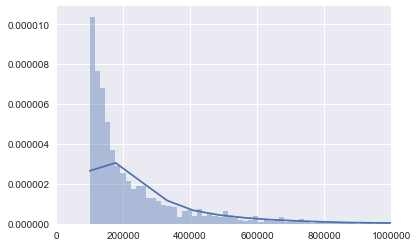

In [6]:
# length of CNVs, and fit mixed geometric distribution
cnv_data = pd.concat([cnvbed_df['delCases'], cnvbed_df['delControls']])
del_length = cnv_data['cnv_end'] - cnv_data['cnv_start']
sns.distplot(del_length, 500)
sns.plt.xlim(0, 1000000)
#sns.distplot(dup_length[0:1000], color="red")
#plt.plot(cnv_length["delControls"])

In [ ]:
# violin plot
import plotly
plotly.offline.init_notebook_mode()
#fig = plotly.figure_factory.create_violin(list(dup_block.values()), colors='#604d9e')
#plotly.offline.iplot(fig, filename='One Violin')

In [20]:
sample_len_del = sample_cnv_length(del_length, args['avg_cnv_per_individual'])
print(sample_len_del)

[ 157318  219774  200308 1158441  157299  148601  118372  120567  151527]


In [21]:
# Now I get n_del sample CNVs but I only know which block it belongs to
# sample_blocks is just a sample set of `block_counts` removing the `count` part: [(chrom, block_position)]
sample_blocks = get_sample_blocks(block_counts, len(sample_len_del))

In [22]:
# Now for each sample block, I:
# 1. give it a random start position unif(block_start, block_start + block_size)
# 2. give it a random end position using L previously sampled
samples = assign_cnv_to_sample(sample_blocks, sample_len_del, 100000)
# print(samples)

## Step 3

In [31]:
# Annotate data with gene names
samples = annotate_samples(samples, gene_df)
# print(samples)

In [24]:
# get causal genes in data
del_causal_genes_in_sample = get_causal_genes(args.causal_genes, samples['gene_name'].tolist())
# dup_causal_genes_in_sample = get_causal_genes(args.causal_genes["causal_genes_dup"], samples['gene_name'].tolist())
#print (samples['gene_name'].tolist())
print ((del_causal_genes_in_sample))

[]


## Step 4

In [19]:
#k = 0.005 # prevalence of the disease
#sim_args = {'shape': 2, 'scale': 1}
num_causal_genes_in_sample = len(del_causal_genes_in_sample)
print (num_causal_genes_in_sample)
p = p_case(args["prevalence"], num_causal_genes_in_sample, args["odds_ratio_params"]["shape"], 
           args["odds_ratio_params"]["scale"])
print(p)

0
0.005


## Putting all together

In [3]:
# main procedure for duplication
genes = load_reference_gene("data/refGene.txt.gz")
empirical_data = load_cnv_data("data/ISC-r1.CNV.bed")
# sample_dup = simulate(genes, pd.concat([empirical_data['dupCases'], empirical_data['dupControls']]), 
#                       args, args.causal_genes["causal_genes_dup"])
# save_data(sample_dup, 'dup_sample_test.pkl')

In [4]:
# main procedure for deletion
sample_del = simulate(genes, pd.concat([empirical_data['delCases'], empirical_data['delControls']]), 
                      args, args.causal_genes)
save_data(sample_del, 'del_sample_test_4000.pkl')

In [30]:
del_sample = load_data("data/del_sample_10.pkl")
# dup_sample = load_data("data/dup_sample_test.pkl")
# print (del_sample)

In [ ]:
#block_counts[idx][0] for idx in sample_idx
[pd.concat(del_sample[item]) for item in ["case", "ctrl"]][0]
#for item, value in del_sample.items() for item in ("case", "ctrl"):
#    values = pd.concat(value)
#    print (item)

In [ ]:
del_sample_gene = get_gene_table(del_sample)
# dup_sample_gene = get_gene_table(dup_sample)
print (del_sample_gene)

In [ ]:
del_stats_table = get_stats(del_sample_gene, num=100, sort=1)
dup_stats_table = get_stats(dup_sample_gene, num=100, sort=0)

In [14]:
print (del_stats_table["top_logp_gene"])

['PTPRD', 'CNTNAP3', 'JUN', 'LOC100132057', 'MIR6077', 'MYSM1', 'NBPF8', 'NBPF9', 'ATAD1', 'CFL1P1', 'KLLN', 'LINC00706', 'LINC00707', 'LINP1', 'PTEN', 'DLG2', 'AKAP13', 'DNM1P46', 'GOLGA6L3', 'LOC642423', 'LYSMD4', 'MEF2A', 'MIR7706', 'PDE8A', 'LOC101927009', 'LOC101928203', 'CDRT15', 'COX10', 'HS3ST3B1', 'MGC12916', 'SH3RF3', 'CPNE4', 'DDX60', 'DDX60L', 'PALLD', 'RWDD4', 'STOX2', 'TRAPPC11', 'LOC102467226', 'LOC646241', 'LOC100507477', 'MIR3668', 'ANKMY2', 'BZW2', 'FAM20C', 'LOC100507642', 'LOC102723672', 'LOC105375115', 'LOC442497', 'LRRC72', 'MIR6839', 'WI2-2373I1.2', 'ZNF107', 'COX6C', 'FBXO43', 'MIR1273A', 'MYOM2', 'POLR2K', 'RGS22', 'RNF19A', 'RUNX1T1', 'SPAG1', 'VPS13B', 'FAM74A1', 'LOC101928195', 'LOC101929583', 'LOC105375972', 'LOC286297', 'SPATA31A1', 'ZNF658B', 'METTL3', 'RAB2B', 'SNORD9', 'SUPT16H', 'TOX4', 'CHD8', 'SNORD8', 'LINC01138', 'NBPF20', 'PPIAL4G', 'LINC00863', 'LINC00864', 'MINPP1', 'MIR4678', 'NUTM2A-AS1', 'NUTM2D', 'PAPSS2', 'ABCC6P1', 'LOC100288162', 'MIR3179

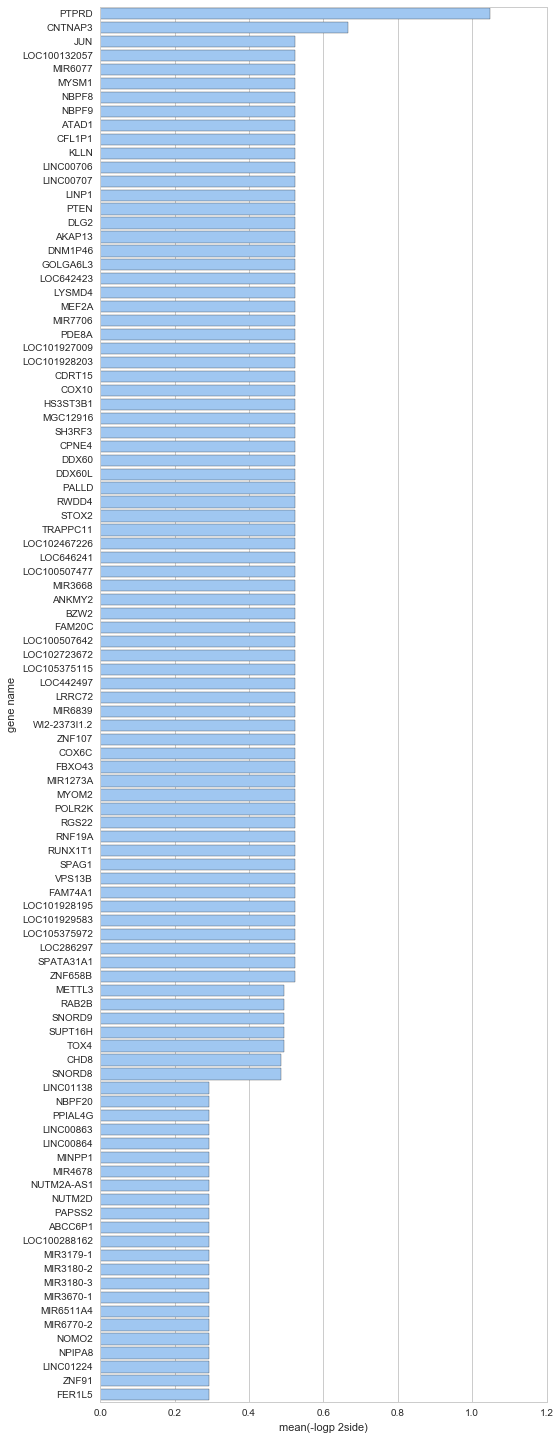

In [15]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(8, 25))
p_df = pd.DataFrame({"-logp 2side": del_stats_table["top_logp_2side"], "gene name": del_stats_table["top_logp_gene"]})
plot = sns.barplot(x="-logp 2side", y="gene name", data=p_df, color="b")
#print (plot)

#### sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(8, 25))
p_df = pd.DataFrame({"logp 2side": dup_stats_table["top_logp_2side"], "gene name":dup_stats_table["top_logp_gene"]})
plot = sns.barplot(x="logp 2side", y="gene name", data=p_df, color="g")

In [3]:
indel = "del"
print (indel + "Cases")

delCases


In [6]:
cnv_data = {"delCases": ["del"], "delControls": ["Controls"]}

In [7]:
cnv_data[indel + "Cases"]

['del']